In [1]:
#steps
#read the txt file with header - in features
#clean all the headers /use map and lambda to do all at once
#pass them as columns in dataframe
#use x-train.txt (with headers from clean_featues)

In [2]:
import numpy as np

In [3]:
#read the features into a dataframe
#make a list and pass it into columns to dataset
import pandas as pd
#list of featuers
raw_features=pd.read_csv("C:\\Users\\Mnsh\\Documents\\GitHub\\Thinkful_downloads\\har\\UCI HAR Dataset\\features.txt", header=None, sep=" ", index_col=False)
#raw_features.head()
raw_features[[1]].head()

,1
0,tBodyAcc-mean()-X
1,tBodyAcc-mean()-Y
2,tBodyAcc-mean()-Z
3,tBodyAcc-std()-X
4,tBodyAcc-std()-Y


In [4]:
#Make a list of desired column
header=raw_features.iloc[:, 1].tolist()

In [5]:
header[:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

In [6]:
#clean the list using lambda which does multiple replacement at the same time
header_new=map(lambda x: x.replace('()', '').replace('_', '') \
               .replace(',', '_').replace('Body', '') \
               .replace('Mag', '').replace('mean', 'Mean') \
               .replace('std', 'STD'), header)

In [7]:
#map object doesn't return any particular object, map saved in a list right after running map
header_list=list(header_new)
len(header_list)

561

In [8]:
header_list[0:5]

['tAcc-Mean-X', 'tAcc-Mean-Y', 'tAcc-Mean-Z', 'tAcc-STD-X', 'tAcc-STD-Y']

In [9]:
#x_vars - save X_train data
x_vars=pd.read_csv("C:\\Users\\Mnsh\\Documents\\GitHub\\Thinkful_downloads\\har\\UCI HAR Dataset\\train\\X_train.txt", header=None, delim_whitespace=True, index_col=False, )

In [15]:
#continuing with original index and adding x to the column head
#x_vars_blackbox=x_vars
#x_vars_blackbox.head()

#col_name=[]
#for i in range (561):
    #col_name.append('x'+str(i))
#col_name[:5]

#col_name[-5:]

In [16]:
#x_vars_blackbox.columns=col_name
#x_vars_blackbox.head()

In [17]:
#x vars from the training set, actual recorded values for acc/gyro and other reading for diff activites/positions
#note length of featues list match columns in this list
x_vars.shape

(7352, 561)

In [18]:
x_vars.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [21]:
#keeping features as column head
x_vars.columns=header_list

In [22]:
x_vars.head()

,tAcc-Mean-X,tAcc-Mean-Y,tAcc-Mean-Z,tAcc-STD-X,tAcc-STD-Y,tAcc-STD-Z,tAcc-mad-X,tAcc-mad-Y,tAcc-mad-Z,tAcc-max-X,...,fGyroJerk-MeanFreq,fGyroJerk-skewness,fGyroJerk-kurtosis,angle(tAccMean_gravity),angle(tAccJerkMean)_gravityMean),angle(tGyroMean_gravityMean),angle(tGyroJerkMean_gravityMean),angle(X_gravityMean),angle(Y_gravityMean),angle(Z_gravityMean)
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [24]:
#x_vars.columns[:561]

In [25]:
#y vars contain the actual position while the recordings were made
## 1 = Walking, 2 = Walking Upstairs, 3 = Walking Downstairs, 4 = Sitting, 5 = Standing, 6 = Laying

y_var=pd.read_csv("C:\\Users\\Mnsh\\Documents\\GitHub\\Thinkful_downloads\\har\\UCI HAR Dataset\\train\\y_train.txt", header=None, delim_whitespace=True, index_col=False, )

In [26]:
#position or activity while the data was being collected
y_var.columns=['Activity']
y_var[:5]

,Activity
0,5
1,5
2,5
3,5
4,5


In [27]:
#finding specific string in columns to work on it
#filter_col=[col for col in list(x_vars) if col.startswith('tBodyAccMag')]
#filter_col[:5]  #tBodyAccMag is not in any columns

[]

In [28]:
#x_vars.filter(regex=r'^tBodyAcc-mean\.', axis=1)
#x_vars.columns.map(lambda x: x.startswith('tBodyAccMag')) #works but gives a boolean value

In [30]:
#x_vars.tail()

In [66]:
#df.loc[:, df.columns.to_series().str.contains('a').tolist()]
#x_vars.loc[:, x_vars.columns.to_series().str.contains('acc').tolist()]   #not working


In [31]:
# list subjests who carried out each activity
subjects = pd.read_csv("C:\\Users\\Mnsh\\Documents\\GitHub\\Thinkful_downloads\\har\\UCI HAR Dataset\\train\\subject_train.txt", header=None, delim_whitespace=True, index_col=False)


In [33]:
#column title
subjects.columns=['Subjects']

In [34]:
subjects.tail()

,Subjects
7347,30
7348,30
7349,30
7350,30
7351,30


In [35]:
#Merging dataframes complete with activity codes - features and their reading and the subjecsts who carried out activitues
data = pd.merge(y_var, x_vars, left_index=True, right_index=True)
data = pd.merge(data, subjects, left_index=True, right_index=True)

In [36]:
data.tail()

,Activity,tAcc-Mean-X,tAcc-Mean-Y,tAcc-Mean-Z,tAcc-STD-X,tAcc-STD-Y,tAcc-STD-Z,tAcc-mad-X,tAcc-mad-Y,tAcc-mad-Z,...,fGyroJerk-skewness,fGyroJerk-kurtosis,angle(tAccMean_gravity),angle(tAccJerkMean)_gravityMean),angle(tGyroMean_gravityMean),angle(tGyroJerkMean_gravityMean),angle(X_gravityMean),angle(Y_gravityMean),angle(Z_gravityMean),Subjects
7347,2,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30
7348,2,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30
7349,2,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30
7350,2,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30
7351,2,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,...,-0.387052,-0.740738,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30


In [38]:
## Make activity a categorical variable
#Activity is already coded in numbers may be this step is not required
data['Activity']= pd.Categorical(data['Activity']).labels

C:\Users\Mnsh\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  app.launch_new_instance()


In [39]:
data.head()

,Activity,tAcc-Mean-X,tAcc-Mean-Y,tAcc-Mean-Z,tAcc-STD-X,tAcc-STD-Y,tAcc-STD-Z,tAcc-mad-X,tAcc-mad-Y,tAcc-mad-Z,...,fGyroJerk-skewness,fGyroJerk-kurtosis,angle(tAccMean_gravity),angle(tAccJerkMean)_gravityMean),angle(tGyroMean_gravityMean),angle(tGyroJerkMean_gravityMean),angle(X_gravityMean),angle(Y_gravityMean),angle(Z_gravityMean),Subjects
0,4,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,4,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,4,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,4,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1
4,4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1


In [40]:
## Split out test data as per instruction given 4 subjects for train, 6 for test and 6 for validation
fortrain = data.query('Subjects >= 27')
fortest = data.query('Subjects<= 6')
forval = data.query("(Subjects >= 21) & (Subjects < 27)")

In [41]:
#imports for analysis 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as skm
import pylab as pl


In [42]:
## Fit random forest
train_target = fortrain['Activity']
train_data = fortrain.ix[:,1:-1] # slicing columns we don't need
rfc = RandomForestClassifier(n_estimators=50, oob_score=True) # this is 50 now
rfc.fit(train_data, train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [43]:
## See oob (out of bag) to show accuracty
rfc.oob_score_  # Is this a better score? 


0.98922558922558923

In [44]:
#finding the most important features, model can be tuned further by selecting out bottom features
#The series weight up to 1
importances = rfc.feature_importances_

In [45]:
#importances.sort()  #gives different results
#importances[-10:]

In [46]:
#printing the respective feature and their weight
#Top 1 is responsible for 5.4% of result, and top 10 about 26%
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
for i in range(10): # finding 10 most important
    print("%d. feature %d (%f)" % (i + 1, indices[i], importances[indices[i]]))

1. feature 40 (0.054720)
2. feature 49 (0.035514)
3. feature 56 (0.034171)
4. feature 558 (0.026031)
5. feature 41 (0.023818)
6. feature 52 (0.023498)
7. feature 51 (0.022332)
8. feature 42 (0.022149)
9. feature 560 (0.016717)
10. feature 344 (0.014708)


In [ ]:
#strategies to improve accuracy, precision  and recall
#keep dropping 20% least important features they are probably redundant
#vary the estimators

In [52]:
%matplotlib inline
imp_list_ft=[]
imp_list_val=[]
for i in range (10):
    imp_list_ft.append(x_vars.columns.values[indices[i+1]])
    imp_list_val.append(importances[indices[i]])
#imp_list_ft
#imp_list_val
#plt.hist(x, bins=xbins, color='blue')
#plt.hist(imp_list_val, color='blue')


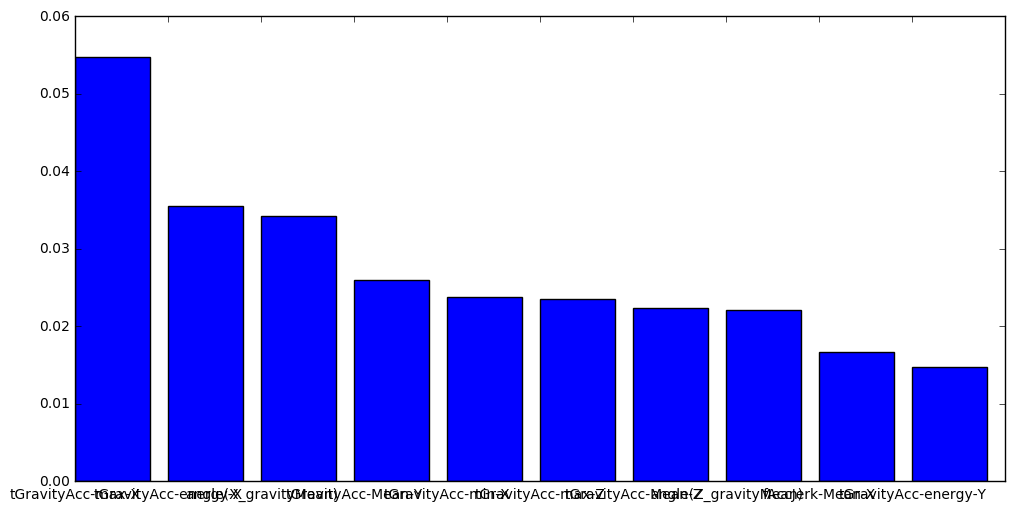

In [51]:
#http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
#plotting importance score along with respective feature
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(range(10), imp_list_val)
plt.xticks(range(10), imp_list_ft)

plt.show()

In [55]:
#validation dataset
#forval.head()

In [57]:
#visualizing the required slice
#forval.ix[:,1:-1].head()

In [59]:
## define validation set and make predictions
val_target = forval['Activity']
val_data = forval.ix[:,1:-1] # i changed his code here to match other data slices
val_pred = rfc.predict(val_data)
val_pred

array([4, 3, 3, ..., 1, 1, 1], dtype=int8)

In [60]:
## Define test set and make predictions
test_target = fortest['Activity']
test_data = fortest.ix[:,1:-1]
test_pred = rfc.predict(test_data)
test_pred

array([4, 4, 4, ..., 2, 2, 2], dtype=int8)

In [61]:
## calculate and print accuracy scores
print("mean accuracy score for validation set = %f" % (rfc.score(val_data, val_target)))
print("mean accuracy score for test set = %f" % (rfc.score(test_data, test_target)))

mean accuracy score for validation set = 0.786540
mean accuracy score for test set = 0.827376


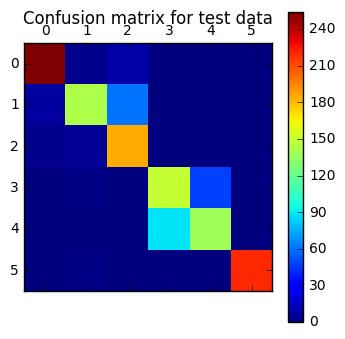

In [62]:
## visualize confusion matrix
test_cm = skm.confusion_matrix(test_target, test_pred)
pl.matshow(test_cm)
pl.title('Confusion matrix for test data')
pl.colorbar()
pl.show()
# confusion matrix lays out instances of predicated class in columns and actual class in row
# i get idea but not how to read

In [ ]:
'''Coming to confusion matrix, it is much detailed representation of what's going on with 
your labels. So there were 71 points in the first class (label 0). Out of these, your model 
was successful in identifying 54 of those correctly in label 0, but 17 were marked as label 4. 
Similarly look at second row. There were 43 points in class 1, but 36 of them were marked correctly. 
Your classifier predicted 1 in class 3 and 6 in class 4.
#http://stackoverflow.com/questions/30746460/how-to-interpret-scikits-learn-confusion-matrix-and-classification-report
'''

In [63]:
print("Accuracy = %f" %(skm.accuracy_score(test_target, test_pred)))
#print("Precision = %f" %(skm.precision_score(test_target, test_pred)))
print("Precision = %f" %(skm.precision_score(test_target, test_pred, average="macro")))
## Precision = number of true positives vs false positives
print("Recall = %f" %(skm.recall_score(test_target, test_pred, average="macro")))
print("F1 score = %f" %(skm.f1_score(test_target, test_pred, average="macro")))
## F1 = weighted average of the precision and the recall. 1 is best value. 


Accuracy = 0.827376
Precision = 0.831635
Recall = 0.824259
F1 score = 0.819736


In [64]:
test_pred[:-15]

array([4, 4, 4, ..., 2, 2, 2], dtype=int8)

In [65]:
#plotting histogram of activies for tAcc-mean

selected_cols=[col for col in x_vars.columns if 'tAcc-Mean' in col]  

In [66]:
print (selected_cols)

['tAcc-Mean-X', 'tAcc-Mean-Y', 'tAcc-Mean-Z', 'tAcc-Mean']


In [68]:
#df['N'].hist(by=df['Letter'])

%matplotlib inline
#x_vars[selected_cols].plot()
#x_vars[selecte_cols].hist(by = x_vars['Activity'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA2E82B9E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001EA359029B0>]], dtype=object)

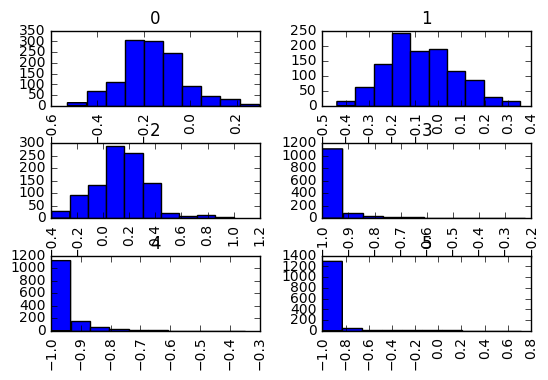

In [69]:
#data[selecte_cols].hist(by = data['Activity'])
data['tAcc-Mean'].hist(by = data['Activity'])